# SVD with SciKit Learn

DS 5001 Text as Data

**Purpose:**  To implement SVD with SciKit Learn and explore application to Austen-Melville corpus.

# Set Up

## Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD as SVD

In [2]:
import plotly_express as px
import seaborn as sns

In [3]:
sns.set(style='ticks')

## Config

In [4]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
output_dir = config['DEFAULT']['output_dir']

In [5]:
data_prefix = 'austen-melville'

In [6]:
OHCO = ['book_id', 'chap_id']

We pick a color map for our gradient visualizations. For more info on color maps, see the [Matplotlib docs](https://matplotlib.org/stable/tutorials/colors/colormaps.html) on the subject.

In [7]:
colors = "YlGnBu" 

# Prepare the Data

## Import tables

**Downloads**

- [austen-melville-LIB_LABELS.csv](https://www.dropbox.com/scl/fi/f63v0pjqemsody71c9sun/austen-melville-LIB_LABELS.csv?rlkey=0ue1mz9x2ycqybcwti0vsnm9y&dl=0)
- [austen-melville-TFIDF_chap_L2.csv](https://www.dropbox.com/scl/fi/25vtge2qf1b5fed9or1y6/austen-melville-TFIDF_chap_L2.csv?rlkey=fkz9yk0enmlzt3z85ouusgcy2&dl=0)

In [8]:
LIB = pd.read_csv(f'{output_dir}/{data_prefix}-LIB_LABELS.csv').set_index('book_id')
TFIDF = pd.read_csv(f'{output_dir}/{data_prefix}-TFIDF_chap_L2.csv').set_index(['book_id', 'chap_id'])

In [23]:
TFIDF

term_str             home     cried   certain   looking    manner   general  \
book_id chap_id                                                               
105     1        0.024020  0.000000  0.012121  0.000000  0.000000  0.000000   
        2        0.045575  0.000000  0.000000  0.015473  0.015544  0.000000   
        3        0.037643  0.025038  0.012663  0.025560  0.000000  0.000000   
        4        0.030691  0.000000  0.015487  0.000000  0.015702  0.031403   
        5        0.024039  0.000000  0.000000  0.024484  0.049193  0.000000   
...                   ...       ...       ...       ...       ...       ...   
34970   110      0.000000  0.023414  0.000000  0.000000  0.000000  0.000000   
        111      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        112      0.027274  0.000000  0.000000  0.000000  0.000000  0.000000   
        113      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        114      0.000000  0.049431  0.000000  0.000000  0.000000  0.000000   

term_str             felt       set        oh     times  ...  breed  hug  \
book_id chap_id                                          ...               
105     1        0.049154  0.011791  0.000000  0.000000  ...    0.0  0.0   
        2        0.046633  0.000000  0.000000  0.000000  ...    0.0  0.0   
        3        0.000000  0.036959  0.024526  0.012263  ...    0.0  0.0   
        4        0.015702  0.000000  0.000000  0.000000  ...    0.0  0.0   
        5        0.036895  0.047203  0.070481  0.035240  ...    0.0  0.0   
...                   ...       ...       ...       ...  ...    ...  ...   
34970   110      0.024013  0.000000  0.000000  0.000000  ...    0.0  0.0   
        111      0.000000  0.000000  0.054538  0.000000  ...    0.0  0.0   
        112      0.000000  0.000000  0.000000  0.000000  ...    0.0  0.0   
        113      0.000000  0.000000  0.093321  0.000000  ...    0.0  0.0   
        114      0.000000  0.000000  0.096842  0.000000  ...    0.0  0.0   

term_str         lash  heathen  recesses  syllables  consumed  kindest  \
book_id chap_id                                                          
105     1         0.0      0.0       0.0        0.0       0.0      0.0   
        2         0.0      0.0       0.0        0.0       0.0      0.0   
        3         0.0      0.0       0.0        0.0       0.0      0.0   
        4         0.0      0.0       0.0        0.0       0.0      0.0   
        5         0.0      0.0       0.0        0.0       0.0      0.0   
...               ...      ...       ...        ...       ...      ...   
34970   110       0.0      0.0       0.0        0.0       0.0      0.0   
        111       0.0      0.0       0.0        0.0       0.0      0.0   
        112       0.0      0.0       0.0        0.0       0.0      0.0   
        113       0.0      0.0       0.0        0.0       0.0      0.0   
        114       0.0      0.0       0.0        0.0       0.0      0.0   

term_str         delayed  curses  
book_id chap_id                   
105     1            0.0     0.0  
        2            0.0     0.0  
        3            0.0     0.0  
        4            0.0     0.0  
        5            0.0     0.0  
...                  ...     ...  
34970   110          0.0     0.0  
        111          0.0     0.0  
        112          0.0     0.0  
        113          0.0     0.0  
        114          0.0     0.0  

[1183 rows x 5000 columns]

# Run SVD

In [10]:
svd_engine = SVD(n_components=10)

In [26]:
DCM = pd.DataFrame(svd_engine.fit_transform(TFIDF), index=TFIDF.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['author','label']], on='book_id')

# Visualize

In [27]:
def vis_pcs(M, a, b, label='author', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

In [28]:
def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VSHORT)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos_group', 
                      marginal_x='box', height=800)

## PC 0 and 1

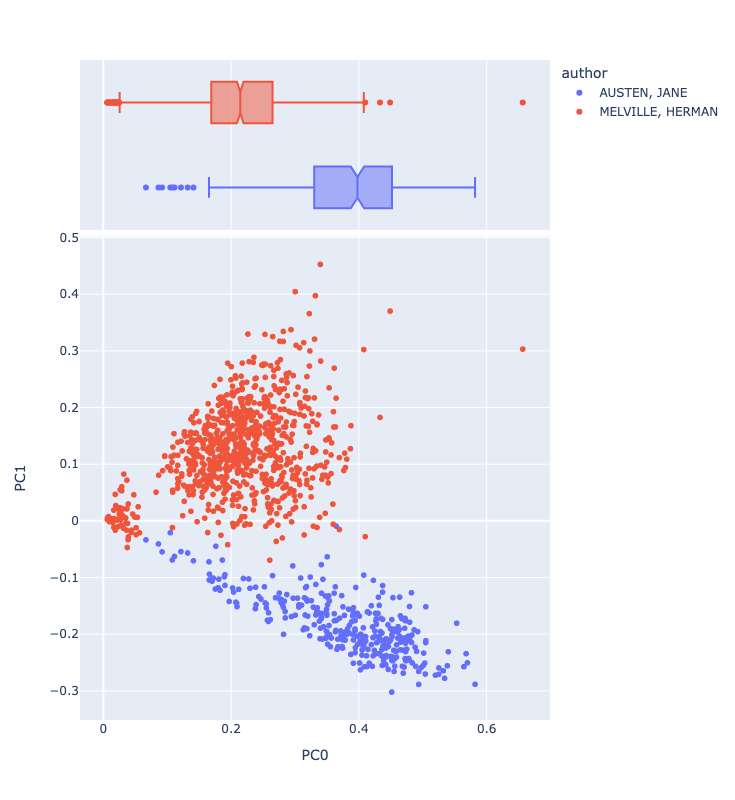

In [29]:
vis_pcs(DCM, 0, 1)

## PC 1 and 2

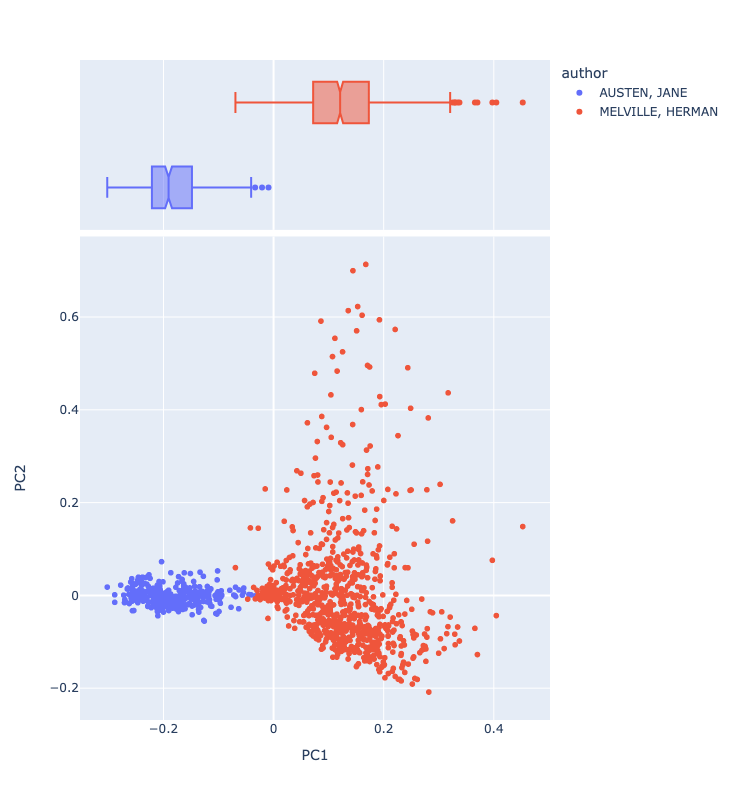

In [22]:
vis_pcs(DCM, 1, 2)

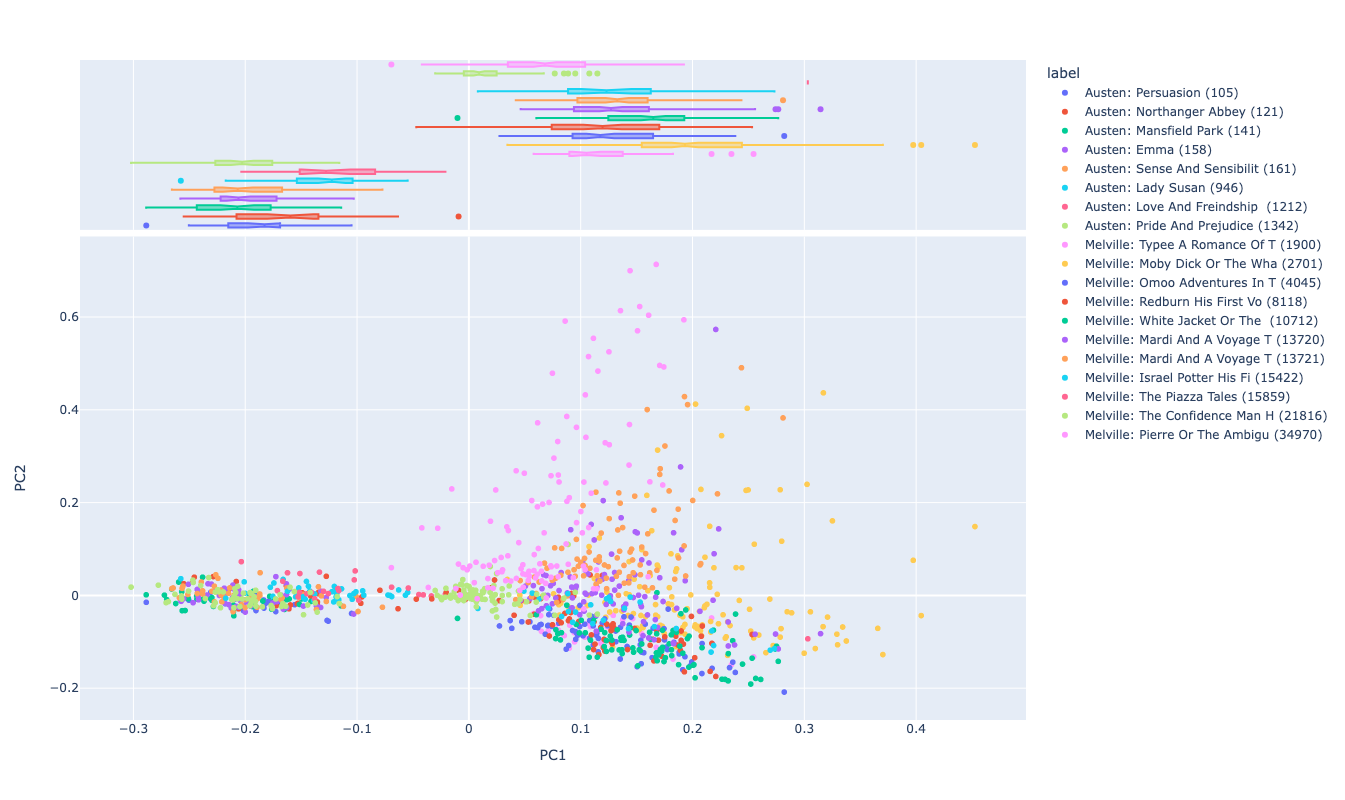

In [16]:
vis_pcs(DCM, 1, 2, label='label')

##  PC 2 and 3

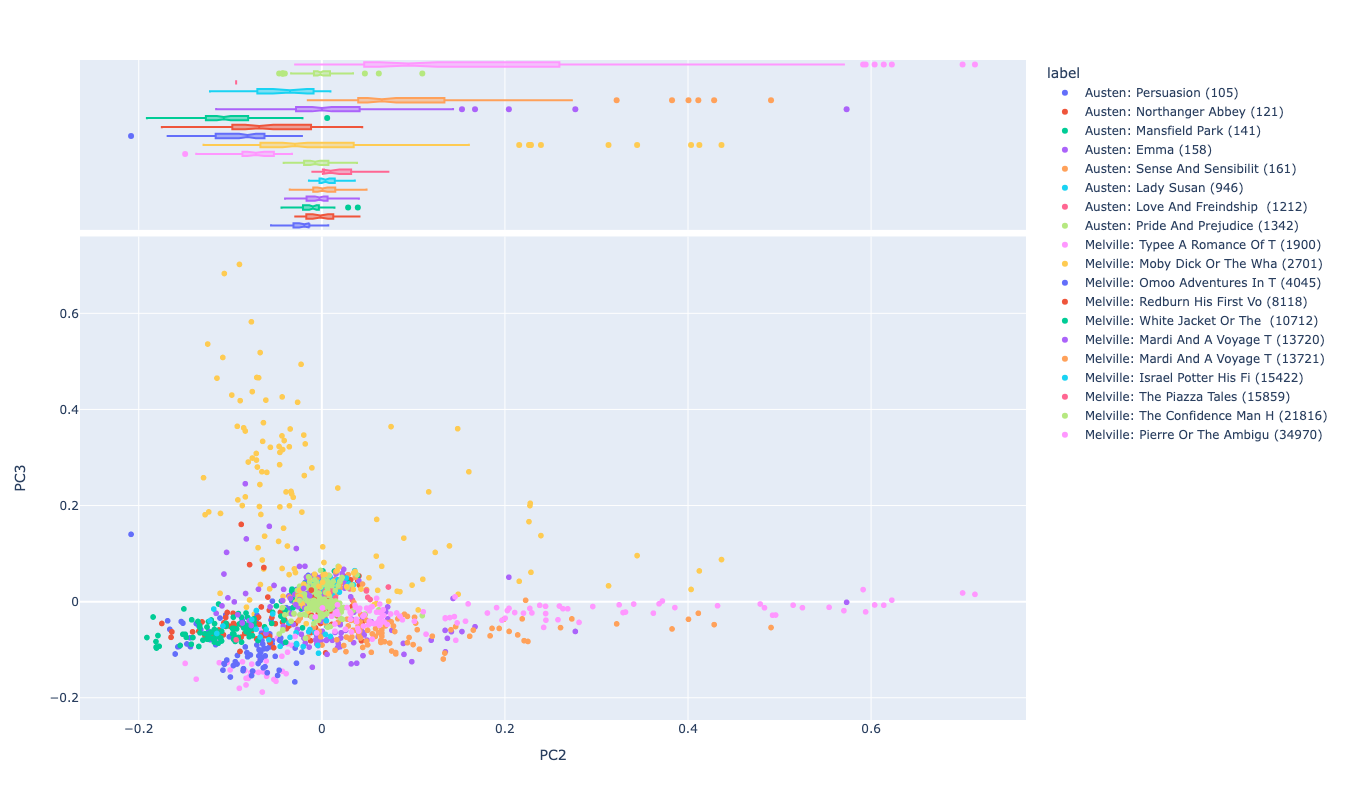

In [25]:
vis_pcs(DCM, 2, 3, label='label')

## Get Loadings

In [18]:
LOADINGS = pd.DataFrame(svd_engine.components_.T * np.sqrt(svd_engine.explained_variance_))
LOADINGS.columns = ["PC{}".format(i) for i in LOADINGS.columns]
LOADINGS.index = TFIDF.columns
LOADINGS.index.name = 'term_str'

In [19]:
top_terms_sk= {}
data = []
for i in range(10):
    for j in [0, 1]:
        data.append((i, j, ' '.join(LOADINGS.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())))

In [20]:
comp_strs = pd.DataFrame(data)
comp_strs.columns =  ['pc', 'pole', 'gloss']
comp_strs = comp_strs.set_index(['pc', 'pole'])

In [21]:
comp_strs.unstack()

gloss  \
pole                                                  0   
pc                                                        
0          was am had said think do dear sister room is   
1      whale thou ship sea ye deck boat thee whales thy   
2       thou thee thy art hath ye oh hast brother thine   
3     whale whales boat boats fish whaling fishery y...   
4     valley whale natives island islanders whales f...   
5     lord cosmopolitan said wine beard dont cried p...   
6     doctor cosmopolitan dont ye yes said confidenc...   
7     cosmopolitan thee doctor confidence book whale...   
8     cosmopolitan boat sea sail craft philosophy bo...   
9     portrait mother book room bed door soul father...   

                                                         
pole                                                  1  
pc                                                       
0     snatch depth sheer exempt tangled woven intrep...  
1     am sister dear letter think wish mother feelin...  
2     ship deck sailors whale war mate officers ship...  
3     natives valley doctor island islanders lord wa...  
4     deck sailors ship thou jacket mate thee office...  
5     thee thou natives valley boat thy ship islande...  
6     war officers american frigate wars lord law ma...  
7     lord ye cried isle sea land sail said isles la...  
8     whale lord room whales ladies war doctor churc...  
9     cosmopolitan doctor thou natives lord thee ye ...